In [34]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
advertising = pd.read_csv("advertising.csv")

In [3]:
# Advertising spend for various categories and resulting sales in 200 markets
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='newspaper', ylabel='sales'>

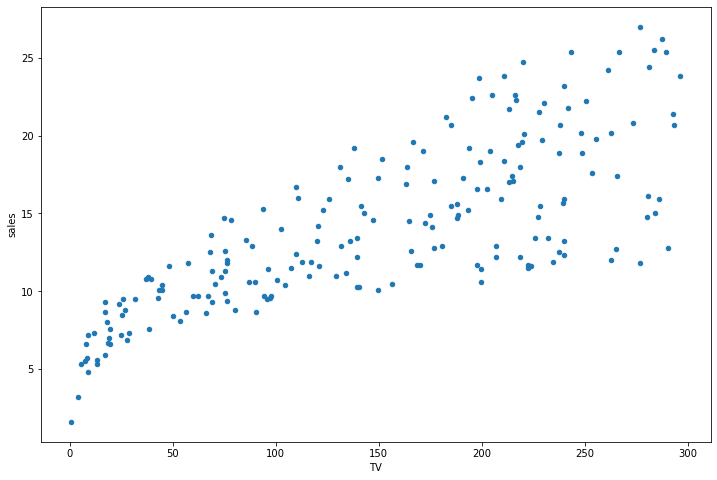

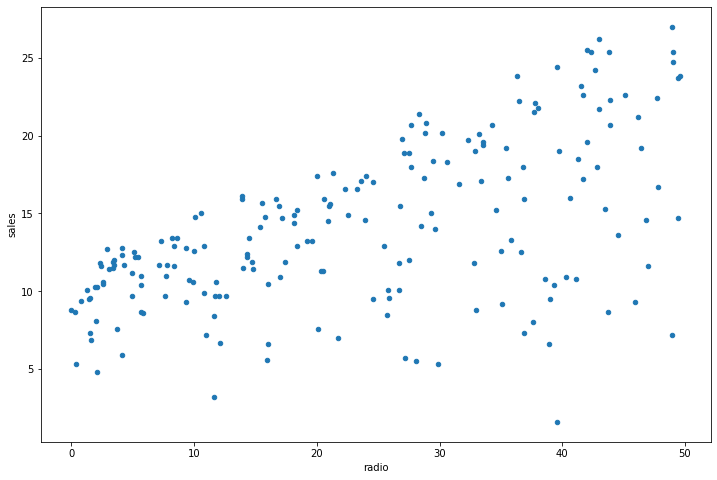

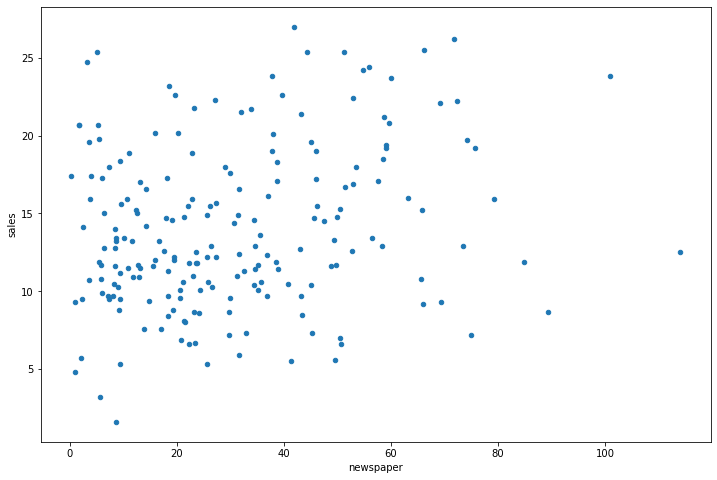

In [5]:
advertising[['TV', 'sales']].plot(kind = 'scatter', x = 'TV', y = 'sales', figsize = (12,8))
advertising[['radio', 'sales']].plot(kind = 'scatter', x = 'radio', y = 'sales', figsize = (12,8))
advertising[['newspaper', 'sales']].plot(kind = 'scatter', x = 'newspaper', y = 'sales', figsize = (12,8))

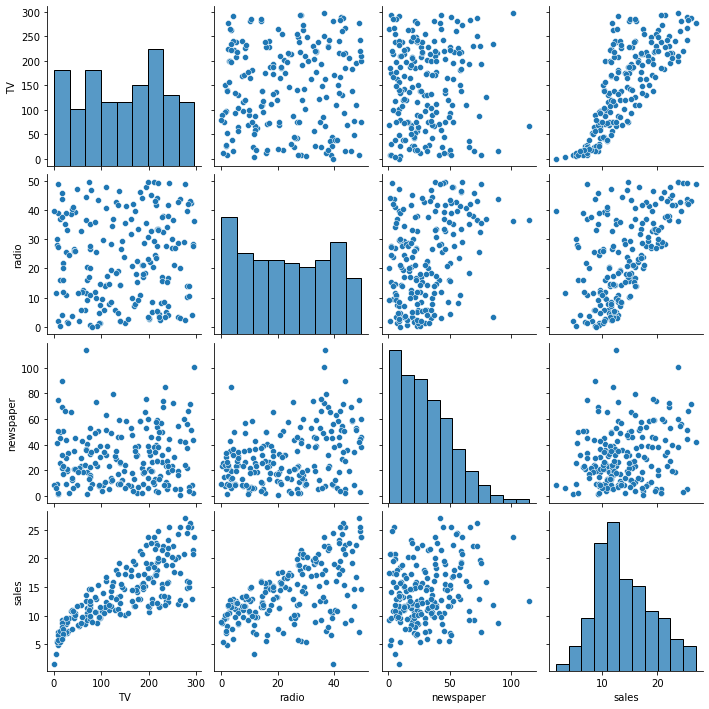

In [34]:
# Pair plots to identify variable relationships & distributions
sns.pairplot(advertising)

<AxesSubplot:title={'center':'Correlation Heatmap'}>

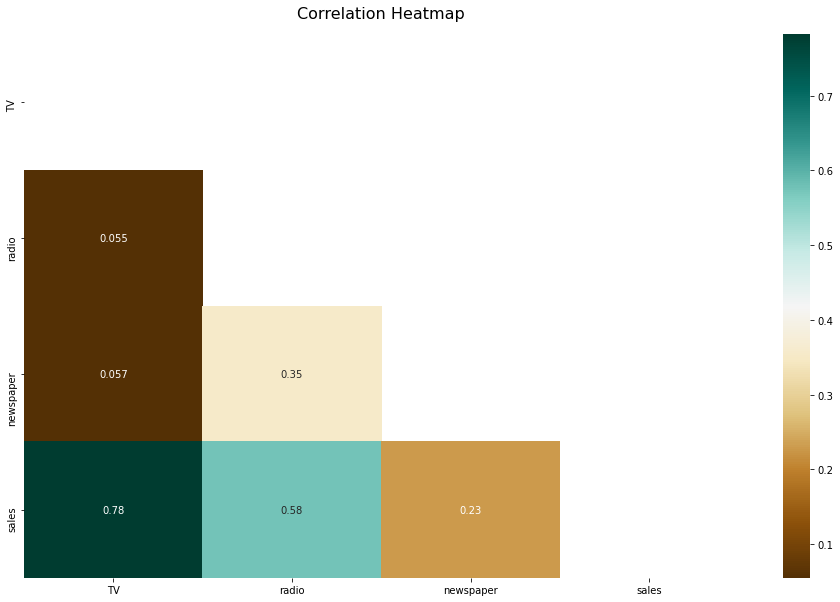

In [10]:
# Generate Correlation Heatmap

def heat_map(df):
    # Set up the figure
    fig = plt.subplots(figsize = (16, 10))

    # Create a mask to only show the bottom half of the correlation matrix
    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool)) # np.triu isolates the upper triangle of a matrix

    heatmap = sns.heatmap(df.corr(), annot = True, mask=mask, cmap = 'BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=16)
    
    return heatmap

heat_map(advertising)


<AxesSubplot:title={'center':'Features Correlating with sales'}>

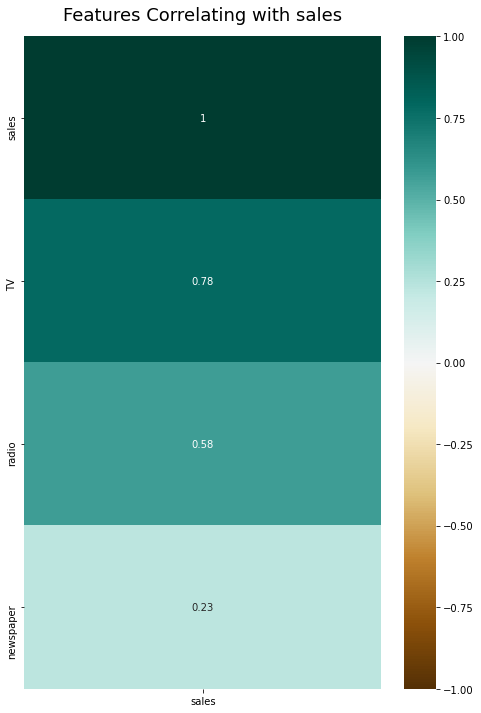

In [12]:
# Generate Correlation Heatmap for a single variable compared to the others

def single_var_heatmap(df, var):
    df.corr()[[var]].sort_values(by=var, ascending=False)

    plt.figure(figsize=(8, 12))
    heatmap = sns.heatmap(df.corr()[[var]].sort_values(by=var, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Features Correlating with ' + var, fontdict={'fontsize':18}, pad=16)
    
    return heatmap

single_var_heatmap(advertising, 'sales')

In [124]:
# Multiple Regression

def multiple_linear_regression(df, y):
    # Split data into testing and training data
    train, test = train_test_split(df, train_size=0.8, random_state=1, shuffle=True)
    
    train_x = train.loc[:, train.columns != y]
    train_y = train[y]

    test_x = test.loc[:, test.columns != y]
    test_y = test[y]
    
    features = train_x.columns.tolist()

    # Model initialization
    regression_model = linear_model.LinearRegression()
    # Fit the data(train the model)
    regression_model.fit(train_x, train_y)
    # Predict
    y_predicted = regression_model.predict(test_x)

    # model evaluation
    rmse = mean_squared_error(test_y, y_predicted)
    r2 = r2_score(test_y, y_predicted)

    # printing values
    print('Slope ')
    for i in range(0, len(features)):
            print('  ' + features[i] + ': ' + str(np.round(regression_model.coef_[i], 3)))
    print('Intercept:', np.round(regression_model.intercept_, 3))
    print('Root mean squared error: ', np.round(rmse, 3))
    print('R2 score: ', np.round(r2, 3))
    
multiple_linear_regression(advertising, y='sales')

Slope 
  TV: 0.047
  radio: 0.179
  newspaper: 0.003
Intercept: 2.908
Root mean squared error:  1.992
R2 score:  0.893


Slope: [0.049]
Intercept: 6.8
Root mean squared error:  10.859
R2 score:  0.415


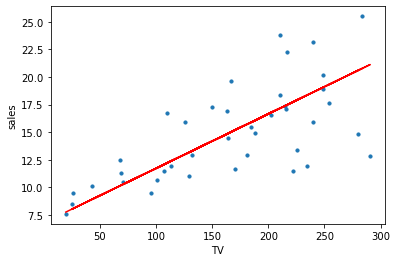

In [88]:
# Uni-variate Regression

def univariate_linear_regression(df, x, y):
    # Split data into testing and training data
    train, test = train_test_split(df, train_size=0.8, random_state=1, shuffle=True)

    train_x = train[[x]]
    train_y = train[y]

    test_x = test[[x]]
    test_y = test[y]

    # Model initialization
    regression_model = linear_model.LinearRegression()
    # Fit the data(train the model)
    regression_model.fit(train_x, train_y)
    # Predict
    y_predicted = regression_model.predict(test_x)

    # model evaluation
    rmse = mean_squared_error(test_y, y_predicted)
    r2 = r2_score(test_y, y_predicted)

    # printing values
    print('Slope:' , np.round(regression_model.coef_, 3))
    print('Intercept:', np.round(regression_model.intercept_, 3))
    print('Root mean squared error: ', np.round(rmse, 3))
    print('R2 score: ', np.round(r2, 3))

    # plotting values

    # data points
    plt.scatter(test_x, test_y, s=10)
    plt.xlabel(x)
    plt.ylabel(y)

    # predicted values
    plt.plot(test_x, y_predicted, color='r')
    plt.show()
    
univariate_linear_regression(advertising, x='TV', y='sales')